In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [57]:
#Generate isotropic Gaussian blobs for clustering.
#it basically create cluster we will not use y 
#or _in place of y as unsupervised learning
#X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=6)

In [58]:
X[:10]


array([[ -7.32786741,   4.23641465],
       [  1.12565931,   6.32088416],
       [ -0.49239887,  -5.28550826],
       [ -7.12432134,   6.16236021],
       [  2.38696269,   4.11331935],
       [  6.55519802, -10.28277104],
       [ -4.60484127,   4.27470475],
       [ -1.27010839,  -6.55718306],
       [  5.77989048,  -9.7922405 ],
       [ -7.72699176,  -9.47166311]])

In [59]:
X.shape

(500, 2)

In [60]:
#y[:10]

In [61]:
#y.shape

In [62]:
X ,_=make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)
#centers is for how many groups we want

In [63]:
X[:10,0]

array([-7.32786741,  1.12565931, -0.49239887, -7.12432134,  2.38696269,
        6.55519802, -4.60484127, -1.27010839,  5.77989048, -7.72699176])

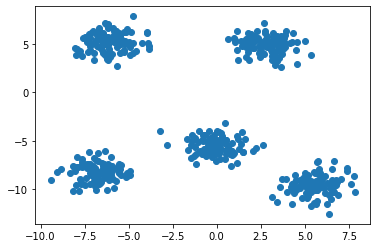

In [64]:
#X[:,feature1] ,X[:,feature2]
plt.scatter(X[:,0],X[:,1])
#five Cluster 
#we have to find labels for them for eg colour mapping 

In [65]:
#first we make from scratch then we do by sklearn

In [66]:
k=5

In [67]:
color=["red","maroon","blue","yellow","orange"]

In [68]:
#intialize clusters- centeroid by finding mean of data(centers) randomly
for i in range(k):
    center =np.random.randint(-8,10,size=(X.shape[1]))

In [69]:
#np.random.randint(-8,10,size=(X.shape[1],))
#or this can be written as
np.random.randint(-8,10,size=(2,))

array([-6, -1])

In [70]:
(X.shape[1],)

(2,)

In [71]:
clusters = {}

# step 1


In [203]:
# Initialize clusters

for i in range(k):
    center = np.random.randint(-8, 10, size= (X.shape[1],), )
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    
    clusters[i] = cluster

In [204]:
clusters
#its a dictonary of all the clusters containing centers and color 
#now points is for the list of all points lying in its region 

{0: {'center': array([ 5, -5]), 'points': [], 'color': 'red'},
 1: {'center': array([-3,  8]), 'points': [], 'color': 'maroon'},
 2: {'center': array([-1,  9]), 'points': [], 'color': 'blue'},
 3: {'center': array([-5, -8]), 'points': [], 'color': 'yellow'},
 4: {'center': array([-6, -4]), 'points': [], 'color': 'orange'}}

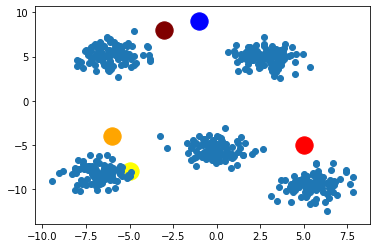

In [205]:

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
    
plt.scatter(X[:, 0], X[:, 1])
    
plt.show()

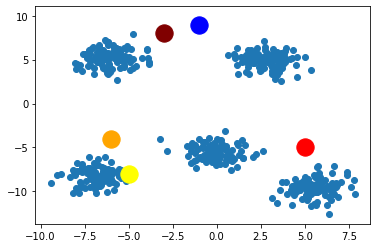

In [206]:
plt.scatter(X[:, 0], X[:, 1])

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
plt.show()

# Step2- Assign All points to nearest Cluster 

In [207]:
#it will iterate over all the points
#find the distance from all 5  =k and include which is nearest or less distance 

In [208]:
#Euclidean Distance b/w cluster pts and cluster center
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

In [209]:
def assignPointsToCluster(clusters, X):
    
    for ix in range(X.shape[0]):#iterate for all the examples
        distance_of_i = [] #we can make alist of five dist from cluster center
        
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #distance of the point with all the five (k) cluster crnters
            distance_of_i.append(d)
            
        cluster_to_choose = np.argmin(distance_of_i)
        #here we want min dist cluster center
        clusters[cluster_to_choose]['points'].append(X[ix])
        #here we are appending the cluster pts in pts list that are mini dist with center 

In [210]:
clusters[0]["center"] 

array([ 5, -5])

In [211]:
assignPointsToCluster(clusters, X)

In [212]:
clusters[3]
#cluster center associated with the nearest point !! 

{'center': array([-5, -8]),
 'points': [array([-0.49239887, -5.28550826]),
  array([-1.27010839, -6.55718306]),
  array([-7.72699176, -9.47166311]),
  array([-6.38596104, -8.8718962 ]),
  array([-7.63463253, -7.74760395]),
  array([-6.7759   , -8.6895189]),
  array([-5.9563883 , -7.60981531]),
  array([-6.95929491, -8.16343   ]),
  array([-2.84586097, -5.39452266]),
  array([-6.77814034, -9.24754289]),
  array([-6.48561512, -7.28690505]),
  array([-1.03572462, -5.17649172]),
  array([-6.56904056, -9.3233823 ]),
  array([-6.14828706, -7.45754949]),
  array([-6.73454483, -8.70306237]),
  array([-6.46091116, -8.35299848]),
  array([-0.73447976, -5.85782982]),
  array([-1.16205749, -6.41501315]),
  array([-0.58317818, -6.61019033]),
  array([-5.41918144, -8.54198453]),
  array([-6.0467759 , -7.97913426]),
  array([-7.16912584, -8.29870613]),
  array([-6.74668755, -6.31755113]),
  array([-7.14778583, -7.57760673]),
  array([-6.00246332, -8.57775249]),
  array([-5.87763123, -8.94149366]),
  

In [213]:
# #plotting clusters
# for kx in range(k):
#         cluster_ke_points = clusters[kx]['points']
#         cluster_ka_color = clusters[kx]['color']
#         cluster_ka_center = clusters[kx]['center']
        
#         cluster_ke_points = np.array(cluster_ke_points)
#         #bcz cluster pts are array of list but we want array so 
#         print(cluster_ke_points.shape)
#         if len(cluster_ke_points)>0:
#             #if no point is associated with cluster center
#             plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
#         plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

In [214]:
def plotclusters(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        cluster_ka_color = clusters[kx]['color']
        cluster_ka_center = clusters[kx]['center']
        
        cluster_ke_points = np.array(cluster_ke_points)
        print(cluster_ke_points.shape)
        if len(cluster_ke_points)>0:
            plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
        plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

# Step - 3 Update centers to mean of all points

In [215]:
def updateCluster(clusters):
    
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        
        cluster_ke_points = np.array(cluster_ke_points)
        
        if len(cluster_ke_points)>0:
            new_center = np.mean(cluster_ke_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge 

In [216]:

cluster_ke_points

array([[ -7.72699176,  -9.47166311],
       [ -6.38596104,  -8.8718962 ],
       [ -7.63463253,  -7.74760395],
       [ -6.7759    ,  -8.6895189 ],
       [ -5.9563883 ,  -7.60981531],
       [ -6.95929491,  -8.16343   ],
       [ -6.77814034,  -9.24754289],
       [ -6.48561512,  -7.28690505],
       [ -6.56904056,  -9.3233823 ],
       [ -6.14828706,  -7.45754949],
       [ -6.73454483,  -8.70306237],
       [ -6.46091116,  -8.35299848],
       [ -5.41918144,  -8.54198453],
       [ -6.0467759 ,  -7.97913426],
       [ -7.16912584,  -8.29870613],
       [ -6.74668755,  -6.31755113],
       [ -7.14778583,  -7.57760673],
       [ -6.00246332,  -8.57775249],
       [ -5.87763123,  -8.94149366],
       [ -8.82853768,  -7.97641388],
       [ -7.49659478,  -9.61341939],
       [ -6.22564947, -10.1277976 ],
       [ -6.39355583,  -7.39968903],
       [ -5.57261376,  -8.31313895],
       [ -7.68048999,  -9.25834575],
       [ -6.85902209, -10.15009031],
       [ -7.17001855,  -7.3955668 ],
 

(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


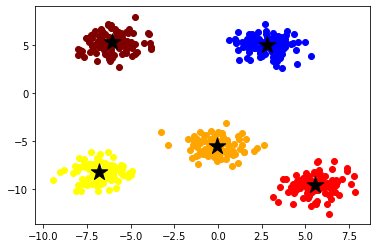

In [221]:
assignPointsToCluster(clusters, X)

plotclusters(clusters)

updateCluster(clusters)
#predictiion 

# Actual Outputs

In [222]:
#Actual 
#for seeing actual output u can check with this 
X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)

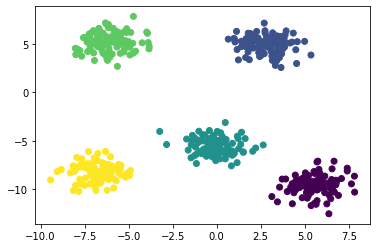

In [223]:
#y is label here 
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

# from Sklearn - KMeans++

In [224]:
from sklearn.cluster import KMeans

In [225]:
km = KMeans(n_clusters=5,)